In [1]:
'''
Program Submission for the course PHY 312: Numerical Methods, IISER Bhopal.

Github Link:
https://github.com/AKnightWing/ColdAsIce

Date: 9th June, 2020.

Team Name: Team ℏ

Project Name: ColdAsIce

Team Members:
Tanmay Bhore
Siddharth Chaini
Siddharth Bachoti
Vipin Khade
Vinay Patil

This Python3 file contains all the necessary functions to reproduce the results in the accompanying report.

'''

import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import colors as clr
from matplotlib.lines import Line2D
import copy
import random
import time


#SET EPS AND KB VALUE
eps = 0.6
kb = 1

In [2]:
def initialise_state(N): #N is the grid dimension (in the above example, N=4)
    '''
    A function to initialise a possible state of NxN atoms. Assigns 1 to all bonds.
    '''
    grid = np.ones((N,N,2),dtype=int)
    
    return np.array(grid)


In [3]:
def plot_vector(p1,p2,num):
    '''
    A function to plot any two vectors on matplotlib via arrows
    '''
    if num>4:
        w = 0.12/num
        h=0.9/num
    else:
        w = 0.03
        h=0.2
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    dx = dp[0]
    dy = dp[1]

    plt.arrow(p1[0], p1[1],
                 dx / 2, dy / 2,
                 width=w, head_width=h,
                 facecolor="k",
                 zorder=0)

    plt.arrow(p1[0] + dx / 2,
                 p1[1] + dy / 2,
                 dx / 2, dy / 2,
                 width=w, head_width=0,
                 facecolor="k",
                 zorder=0)

def get_coord_list(arr):
    '''
    A function to get the coordinates of all atoms. Used for visualising our model.
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr,savefig=False,savename=".temp",show=True):
    '''
    Wrapper function to visualise a 2D ice model when input an array on dim (n,n,2)
    '''
    num = len(arr)
    if num<4:
        mksize = 35/num 
    else:
        mksize=(35/num)+0.5
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)
            
            plt.plot(x_current,y_current,
                        marker="o", markersize=mksize, markeredgecolor="k",
                        markerfacecolor="yellowgreen",
                        zorder=1)

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1],num)
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current],num)

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current],num)
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current],num)

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1],num)
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current],num)

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current],num)
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current],num)
    plt.xlim(-1,num)
    plt.ylim(-1,num)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()


In [4]:
def create_6_vertex_configs():
    '''
    A function to create the 6 images for the types of single vertex configs in the report.
    '''
    configlist = [(1,1,-1,-1),
            (-1,-1,1,1),
            (1,-1,-1,1),
            (-1,1,1,-1),
            (-1,1,-1,1),
            (1,-1,1,-1)]
    
    for i in range(len(configlist)):
        config=configlist[i]
        plt.axes().set_aspect('equal')
        if config[0]==1:
            plot_vector([0,0],[0,1],5) #Up
        else:
            plot_vector([0,1],[0,0],5) #Up
        if config[1]==1:
            plot_vector([0,0],[1,0],5) #Right
        else:
            plot_vector([1,0],[0,0],5) #Right
        if config[2]==-1:
            plot_vector([0,-1],[0,0],5) #Down
        else:
            plot_vector([0,0],[0,-1],5)
        if config[3]==-1:
            plot_vector([-1,0],[0,0],5) #Left
        else:
            plot_vector([0,0],[-1,0],5)
        plt.plot(0,0,
                    marker="o", markersize=35, markeredgecolor="k",
                    markerfacecolor="yellowgreen",
                    zorder=1)
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.axis('off')
        plt.show()
        plt.close()


In [5]:
def check_config(arr):
    '''
    Function to check if given state follows the ice rules.
    '''
    flag=True
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            
            left_neighbour_right_state = arr[i][j-1][1]


            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            
            if (current_up_state + current_right_state + current_left_state + current_down_state) != 0:
                flag=False
                break
    return flag


In [6]:
def long_loop(arr2, verbose=False):
    '''
    Implementation of the long loop algorithm
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
             #assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        elif prev_choice =="up":
            forbidden_choice="down"
        elif prev_choice =="left":
            forbidden_choice="right"
        elif prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

def short_loop(arr2, verbose=False):
    '''
    Implementation of the short loop algorithm
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pts =[]
    prev_choice=None
    forbidden_choice = "None"
    while True:
        iters+=1
        if iters !=1 and (n1,n2) in inital_pts:
            idx=inital_pts.index((n1,n2))
            reset_pts=inital_pts[:idx]
            for thispt in reset_pts:
                arr[thispt[0]][thispt[1]][0]=arr2[thispt[0]][thispt[1]][0]
                arr[thispt[0]][thispt[1]][1]=arr2[thispt[0]][thispt[1]][1]
            if verbose:
                print(f"Completed in {iters} iterations.")
            break
        
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]
        if prev_choice =="right":
            forbidden_choice="left"
        elif prev_choice =="up":
            forbidden_choice="down"
        elif prev_choice =="left":
            forbidden_choice="right"
        elif prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None
        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break
        prev_choice=out_choice
        
        inital_pts.append((n1,n2))     #append old n1,n2
        
        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue
        
    return arr

In [7]:
def count_states(num,error_threshold,return_dict = False,verbose=False):
    '''
    Function to count total possible states for num x num atoms.
    '''
    if not (error_threshold<=100 and error_threshold>0):
        print("Error! Please input error_threshold as a value between 0 and 100")
        assert (error_threshold<=100 and error_threshold>0)
    state_dict={}
    oldarr = short_loop(initialise_state(num), verbose=False)
    good_iterations = 0           #Iterations that gave us a new state, so good.
    bad_iterations = 0               #Iterations that gave us an already found state,so a waste and hence bad.
    while True:
        newarr = short_loop(oldarr,verbose=False)
        name =arr_to_string(newarr)
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
            good_iterations+=1
        else:
            bad_iterations+=1
            count_repetitions+=1
            state_dict[name]+=1
        percent_approx_err=good_iterations*100/(good_iterations+bad_iterations)
        if verbose:
            print(f"Good iterations = {good_iterations} and bad iterations = {bad_iterations} and Error % = {percent_approx_err}", end="\r",flush=True)
        if percent_approx_err < error_threshold:
            break
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict
    else:
        return len(state_dict)


In [8]:
def state2to4(arr):
    '''
    Convert an (n,n,2) array to an (n,n,4) array.
    '''
    fourstatearr=np.zeros((arr.shape[0],arr.shape[1],4))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            left_neighbour_right_state = arr[i][j-1][1]
            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            fourstatearr[i][j][0] = current_up_state
            fourstatearr[i][j][1] = current_right_state
            fourstatearr[i][j][2] = current_down_state
            fourstatearr[i][j][3] = current_left_state

    return fourstatearr


In [9]:
def rot90_anticlock(arr2):
    '''
    Function to generate 90deg anticlockwise rotation
    Up becomes left, left becomes down, down becomes right, right becomes up.
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,1)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_right_state
            new_right_state = current_down_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

def rot180_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    Function to generate 180deg anticlockwise rotation
    Up becomes down, left becomes right, down becomes up, right becomes left.
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,2)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_down_state
            new_right_state = current_left_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

def rot270_anticlock(arr2):
    '''
    Function to generate 270deg anticlockwise rotation
	Up becomes right, left becomes up, down becomes left, right becomes down
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,3)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_left_state
            new_right_state = current_up_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

def hor_flip(arr2):
    '''
    Function to generate a horizontally flipped configuration
    '''
    arr = np.flip(arr2,1)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_left_state = arr[i][j][1]
            
            right_neighbour_left_state = arr[i][(j+1)%num][1]
            current_right_state = - (right_neighbour_left_state)

            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr.astype(int)

def ver_flip(arr2):
    '''
    Function to generate a vertically flipped configuration
    '''
    arr = np.flip(arr2,0)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_down_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            
            upper_neighbour_down_state = arr[i-1][j][0]
            current_up_state = - (upper_neighbour_down_state)
            
            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr.astype(int)

def flip_secondary_diag(arr2):
    '''
    Function to generate a secondary diagonal flipped configuration.
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if (i+j)<=N-1:
                dist = N-(i+j+1)
                arr[i][j][0], arr[i+dist][j+dist][0], arr[i][j][1], arr[i+dist][j+dist][1] = arr[i+dist][j+dist][1], arr[i][j][1], arr[i+dist][j+dist][0], arr[i][j][0]                
    return arr.astype(int)

def flip_primary_diag(arr2):
    '''
    Function to generate a primary diagonal flipped configuration.
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    arr = rot90_anticlock(flip_secondary_diag(rot270_anticlock(arr)))
    return arr.astype(int)

def get_all_column_translations(arr):
    '''
    Return a list of arrays containing all possible column translations.
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[:,0:i].reshape(N,-1,2)
        a2 = arr[:,i:].reshape(N,-1,2)
        res = np.hstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

def get_all_row_translations(arr):
    '''
    Return a list of arrays containing all possible column translations.
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[0:i,:].reshape(-1,N,2)
        a2 = arr[i:,:].reshape(-1,N,2)
        res = np.vstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

def arr_to_string(arr2):
    '''
=   Convert a state array to a unique string.
    '''
    arr = copy.deepcopy(arr2)
    name = ' '.join(map(str, arr.flatten())).replace(' ','')
    return name

def string_to_arr(s):
    '''
    Convert the above string back to an array.
    '''
    replaced_str = s.replace("-1","0")
    arr=[]
    for i in replaced_str:
        if i=='1':
            arr.append(1)
        elif i=="0":
            arr.append(-1)
        else:
            print("ERROR")
            assert(1==0)
    arr = np.array(arr)
    arr = arr.reshape(int(np.sqrt(len(arr)/2)),int(np.sqrt(len(arr)/2)),2)
    return arr

def remove_symmetries(all_names, verbose=False):
    '''
    Function to remove all symmetries for a given list of state strings (names)
    '''
    assert type(all_names)==list
    for i,given_name in enumerate(all_names):
        if verbose and i%100 ==0:
            print(f"Loading... {i}/{len(all_names)} done. Percent Completed = {100*i/len(all_names)}.", end="\r",flush=True)
        arr = string_to_arr(given_name)
        #Column Translation symmetries
        templist=get_all_column_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Row Translation symmetries
        templist=get_all_row_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Check 90 degree rotation symmetry
        name = arr_to_string(rot90_anticlock(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 180 degree rotation symmetry
        name = arr_to_string(rot180_anticlock(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 270 degree rotation symmetry
        name = arr_to_string(rot270_anticlock(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check horizontal flip symmetry
        name = arr_to_string(hor_flip(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check vertical flip symmetry
        name = arr_to_string(ver_flip(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check secondary diagonal flip symmetry
        name = arr_to_string(flip_secondary_diag(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check primary diagonal flip symmetry
        name = arr_to_string(flip_primary_diag(arr))
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)
    return all_names


In [10]:
def calculate_energy(arr,eps):
    '''
    A function to calculate the energy for a given state array and epsilon.
    '''
    N = len(arr)
    s = 0
    for i in range(len(arr)):
        for j in range(len(arr)):  
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0] 
            left_neighbour_right_state = arr[i][j-1][1]
            if  current_up_state ==1 and lower_neighbour_up_state == -1 : 
                s+= 1
            elif current_right_state == 1 and left_neighbour_right_state == -1:
                s+= 1
    return (-s*eps)

In [11]:
def calculate_atom_config(arr):
    '''
    A function to represent all atoms as a combination of the 6 possible vertex configurations.
    '''
    tupdict = {
        (1,1,-1,-1):1,
        (-1,-1,1,1):2,
        (1,-1,-1,1):3,
        (-1,1,1,-1):4,
        (-1,1,-1,1):5,
        (1,-1,1,-1):6
    }
    num=len(arr)
    typearr = np.zeros((arr.shape[0],arr.shape[1]))
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]

            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            tup = (current_up_state,current_right_state,current_down_state,current_left_state)
            atomtype = tupdict[tup]
            typearr[i][j] = atomtype
    return typearr.astype(int)

def visualise_atom_config_with_bonds(arr,savefig=False,savename=".temp",show=True):
    '''
    A function to visualise the state array as a combination of the 6 possible vertex configurations. 
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    atom_config_arr = calculate_atom_config(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            if atom_config_arr[i][j]==5:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="cyan",
                            zorder=1)
            elif atom_config_arr[i][j]==6:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="magenta",
                            zorder=1)
            else:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="gray",
                            zorder=1)                
            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1],num)
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current],num)

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current],num)
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current],num)

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1],num)
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current],num)

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current],num)
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current],num)
    plt.xlim(-1,num)
    plt.ylim(-1,num)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

def visualise_final_state(arr,title="",savefig=False,savename=".temp",show=True):
    '''
    A function to generate a checkerboard plot (as given in the report) for a given state array.
    '''

    atom_config_arr = calculate_atom_config(arr)
    colordict = {1:0,2:0,3:0,4:0,5:-1,6:1}
    atom_config_arr_copy = np.copy(atom_config_arr)
    for key, val in colordict.items(): atom_config_arr_copy[atom_config_arr==key] = val
    flipped_arr = np.flip(atom_config_arr_copy,0)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    ax.set_aspect('equal')
    cmap = plt.cm.coolwarm
    norm = clr.Normalize(vmin=-1, vmax=1)
    hexlist = [clr.to_hex(cmap(norm(-1))),clr.to_hex(cmap(norm(0))),clr.to_hex(cmap(norm(1)))]

    legend_elements = [
                    Line2D([0], [0], marker='o', color='w', label='Type 1/2/3/4',markerfacecolor=hexlist[1], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Type 5',markerfacecolor=hexlist[0], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Type 6',markerfacecolor=hexlist[2], markersize=10)
                        ]
    ax.pcolormesh(flipped_arr,cmap=cmap,norm=norm)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])

    ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(title)
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()


In [12]:
def metropolis_move(arr,temp,verbose = False):
    '''
    A function to make the metropolis move as part of the F model.
    Dependencies: Uses energy(arr) function
    and short_loop(arr) function.
    
    '''
    new = short_loop(arr, verbose = verbose)
    old_energy = calculate_energy(arr,eps)
    new_energy = calculate_energy(new,eps)
    delta_E = new_energy - old_energy

    if temp >0:
        beta = 1/(temp*kb)
        if delta_E <0:
            arr = new
        elif np.random.uniform() < np.exp(-beta*delta_E):
            arr = new
    elif temp==0:
        if delta_E <0:
            arr = new
    return arr

In [13]:
def calculate_vector_polarization(arr):
    '''
    A function to calculate the polarization vector for a given state array.
    '''
    N = len(arr)**2
    vert = arr[:,:,0].sum()
    hor = arr[:,:,-1].sum()
    polarization= ((1/((2**0.5)*N))*hor,(1/((2**0.5)*N))*vert)
    return polarization[0],polarization[1]

def calculate_polarization(arr):
    '''
    A function to calculate the polarization value for a given state array.
    '''
    polarization=calculate_vector_polarization(arr)
    polval = np.sqrt(polarization[0]**2 + polarization[1]**2)
    return polval


def calculate_old_polarization(arr):
    '''
    DEPRECATED: 12th June 2020
    A function to calculate the polarization for a given state array.
    '''
    vert = 0
    hor = 0
    N = len(arr)**2
    for i in arr:
        for j in i:
            vert+=j[0]
            hor+=j[1]

    polarization= ((1/((2**0.5)*N))*hor,(1/((2**0.5)*N))*vert)
    
    polval = np.sqrt(polarization[0]**2 + polarization[1]**2)
    
    return polval


In [14]:
def equilibrate(n,temp,breaking_iters=3000,return_polarlist=False,verbose=False):
    '''
    A function to equilibrate any array of size n x n, i.e use the metropolis move till it has plateaued.
    '''
    assert temp>=0
    arr = initialise_state(n)
    polar_list=[]
    iter_list=[]
    polval = calculate_polarization(arr)
    for i in range(breaking_iters):
        if verbose:
            print(f"Pol = {polval} and iter = {i}",end="\r",flush=True)
        arr=metropolis_move(arr,temp)
        newpolval = calculate_polarization(arr)
        polar_list.append(polval)
        polval=newpolval
    if return_polarlist:
        return polar_list,arr
    else:
        return arr

def equilibrate_existing(arr2,temp,breaking_iters=3000,return_polarlist=False,verbose=False):
    '''
    A function to equilibrate a given state array, i.e use the metropolis move till it has plateaued.
    '''
    assert temp>=0
    arr = copy.deepcopy(arr2)
    n=len(arr)
    polar_list=[]
    iter_list=[]
    polval = calculate_polarization(arr)
    for i in range(breaking_iters):
        if verbose:
            print(f"Pol = {polval} and iter = {i}",end="\r",flush=True)
        arr=metropolis_move(arr,temp)
        newpolval = calculate_polarization(arr)
        polar_list.append(polval)
        polval=newpolval
    if return_polarlist:
        return polar_list,arr
    else:
        return arr

In [15]:
def get_sp_heat_and_energy(n,temp,breaking_iters=3000):
    '''
    A function to calculate the specific heat, energy and polar.
    '''
    arr = equilibrate(n,temp,breaking_iters=breaking_iters)
    #polar_list=[]
    energy_list=[]
    for i in range(100):
        arr=metropolis_move(arr,temp)
        en=calculate_energy(arr,eps)
        #pol=calculate_polarization(arr)
        energy_list.append(en)
        #polar_list.append(pol)
    energy_list = np.array(energy_list)
    #polar_list = np.array(polar_list)
    energy = energy_list.mean()
    #pol = polar_list.mean()
    beta = 1/(temp*kb)
    sp_heat = beta**2 *kb* ((energy_list**2).mean() - (energy_list.mean())**2)/n**2
    return sp_heat, energy
    #return sp_heat, energy, pol

In [16]:
def save_equilibration_snapshots(n,temp_min=0.001,temp_max=15,n_points=50,verbose=False):
	'''
	A function to save the equilibration snapshots as pngs.
	'''
	temp_arr=np.linspace(temp_min,temp_max,n_points)
	if verbose:
		print(f" TEMP = {temp} *******")
	for temp in temp_arr:
		arr2 = equilibrate(n,temp=temp)        
		title=f"T = {temp} K"
		visualise_final_state(arr2,title=title,savefig=True,savename=title)

def generate_gif(input_dir,output_dir,framerate):
    '''
    A function that creates a GIF showing the equilibriation of a lattice as the temperature is decreased.
    It uses the images generated by the function 'save_equilibriation_snapshots()'.
    '''
    frames = []
    dirname = input_dir
    temperatures = []
    for i in os.listdir(dirname):
        t = (i.split('T = '))[1].split(' K.png')[0]
        temperatures.append(float(t))
    temperatures.sort(reverse=True)#Make reverse flase in order to show the animation from 0->15K

    filenames = []
    for j in temperatures:
        filenames.append(dirname + '/' + 'T = ' + str(j) + ' K.png')

    for i in filenames:
        frames.append(Image.open(i))
    gifname = output_dir + 'Movie.gif'
    duration = int(1000/framerate)
    frames[0].save(gifname, format='GIF',append_images=frames[1:],save_all=True,duration=duration, loop=1)

Example of an ice model.


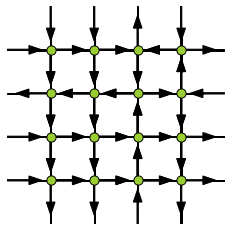

In [17]:
if __name__=="__main__":
	#EXAMPLE OF A STATE ARRAY
	print("Example of an ice model.")
	arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
	         [[-1,-1],[-1,-1],[-1,1],[1,-1]],
	         [[-1,1],[-1,1],[1,1],[-1,1]],
	         [[-1,1],[-1,1],[1,1],[-1,1]]]
	arr = np.array(arr)

	visualise_2d_model(arr)



In [38]:
plist,arr = equilibrate(3,temp=0.1,return_polarlist=True)

In [43]:
for i in range(1000):
    arr = initialise_state(3)
    arr2 = short_loop(arr)
    if not check_config(arr2):
        print(i)

In [40]:
check_config(arr)

False

In [27]:
visualise_final_state(arr)

KeyError: (1, 1, 1, -1)

In [31]:
tupdict = {
    (1,1,-1,-1):1,
    (-1,-1,1,1):2,
    (1,-1,-1,1):3,
    (-1,1,1,-1):4,
    (-1,1,-1,1):5,
    (1,-1,1,-1):6
}
num=len(arr)
typearr = np.zeros((arr.shape[0],arr.shape[1]))


In [32]:
for i in range(len(arr)):
    for j in range(len(arr)):
        current_up_state = arr[i][j][0]
        current_right_state = arr[i][j][1]

        lower_neighbour_up_state = arr[(i+1)%num][j][0]

        left_neighbour_right_state = arr[i][j-1][1]

        current_down_state = -(lower_neighbour_up_state)
        current_left_state = -(left_neighbour_right_state)

        tup = (current_up_state,current_right_state,current_down_state,current_left_state)
        atomtype = tupdict[tup]
        typearr[i][j] = atomtype


KeyError: (1, 1, 1, -1)

In [35]:
check_config(arr)

False